### 1. Import Dependencies

In [23]:
import os
import pandas as pd #alias
import numpy as np #alias
import seaborn as sns
from matplotlib import pyplot as plt

### 2. Basic Processing

In [24]:
df = pd.read_csv("processed\Missing_values_handled.csv")
df.head(10)

CreditScore Geography  Gender    Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.00       2       0.00              1   
1          608     Spain  Female  41.00       1   83807.86              1   
2          502    France  Female  42.00       8  159660.80              3   
3          699    France  Female  38.91       1       0.00              2   
4          850     Spain  Female  43.00       2  125510.82              1   
5          645     Spain    Male  44.00       8  113755.78              2   
6          822    France    Male  50.00       7       0.00              2   
7          376   Germany  Female  29.00       4  115046.74              4   
8          501    France    Male  44.00       4  142051.07              2   
9          684    France    Male  27.00       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

In [25]:
print(f"No of rows : {len(df)}") 

No of rows : 10000


### 3. Outlier detection techniques

#### 3.1 Distribution plots

Categorical Variables 
 - Nominal (Geography, Gender, HasCrCard, IsActiveMember, Exited(Exited is the target - churned or not))
 - Ordinal (NumOfProducts)

Numerical Variables 
 - Discrete ()
 - Continues (Age, Balance, EstimatedSalary, Tenure, CreditScore)
---
 - Discrete Numerical variable means its Categorical.
 - Categorical dont always have to has a  String variable.
    - Gender ( Male - 1 / Female - 0) - its not Numerical, its Categorical

In [36]:
categorical_columns = [
                        'Geography',
                        'Gender',
                        'HasCrCard',
                        'IsActiveMember',
                        'NumOfProducts',
                        'Exited'
                    ]

numerical_columns = [
                        'Age', 
                        'Balance',
                        'EstimatedSalary',
                        'Tenure',
                        'CreditScore'
                    ]

#### 3.1.1 Plotting Numerical Columns

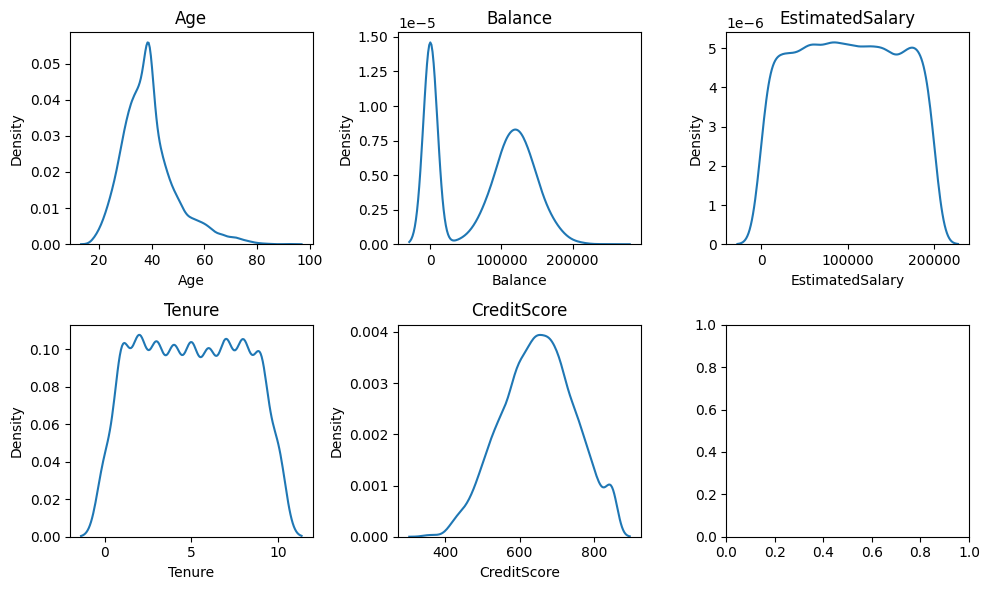

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(
                data=df[col], 
                ax = axes[idx]
                )
    axes[idx].set_title(col)
    
plt.tight_layout()

plt.show()

- The Age is Right Scewed - Not normal distributed
- Tenure is Uniformed
- Credit Score is a normal distribution (amlost) 
- Balance has two modalities ( modality means a peak in the grapgh) - balance have 2 peaks we call it Bi-Modal. data set has two distributions that merged.
    - 0 means - a lot of people doesnt maintain their account that why it has a peak.
- Estimated salary is pretty much uniformed.

#### 3.1.2 Plotting Categorical Columns

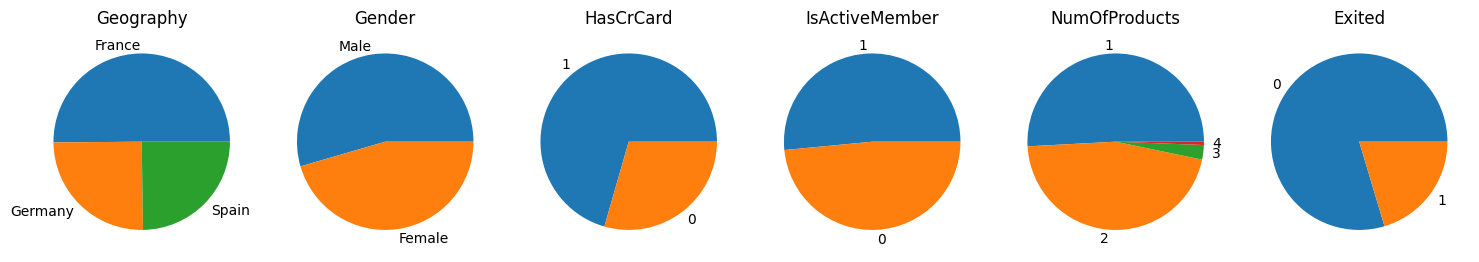

In [49]:
fig, axes = plt.subplots(1, 6, figsize=(15, 10))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                                kind='pie',
                                ax=axes[idx]
                                )
    
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

plt.tight_layout()

plt.show()


#### 3.2 Box plots

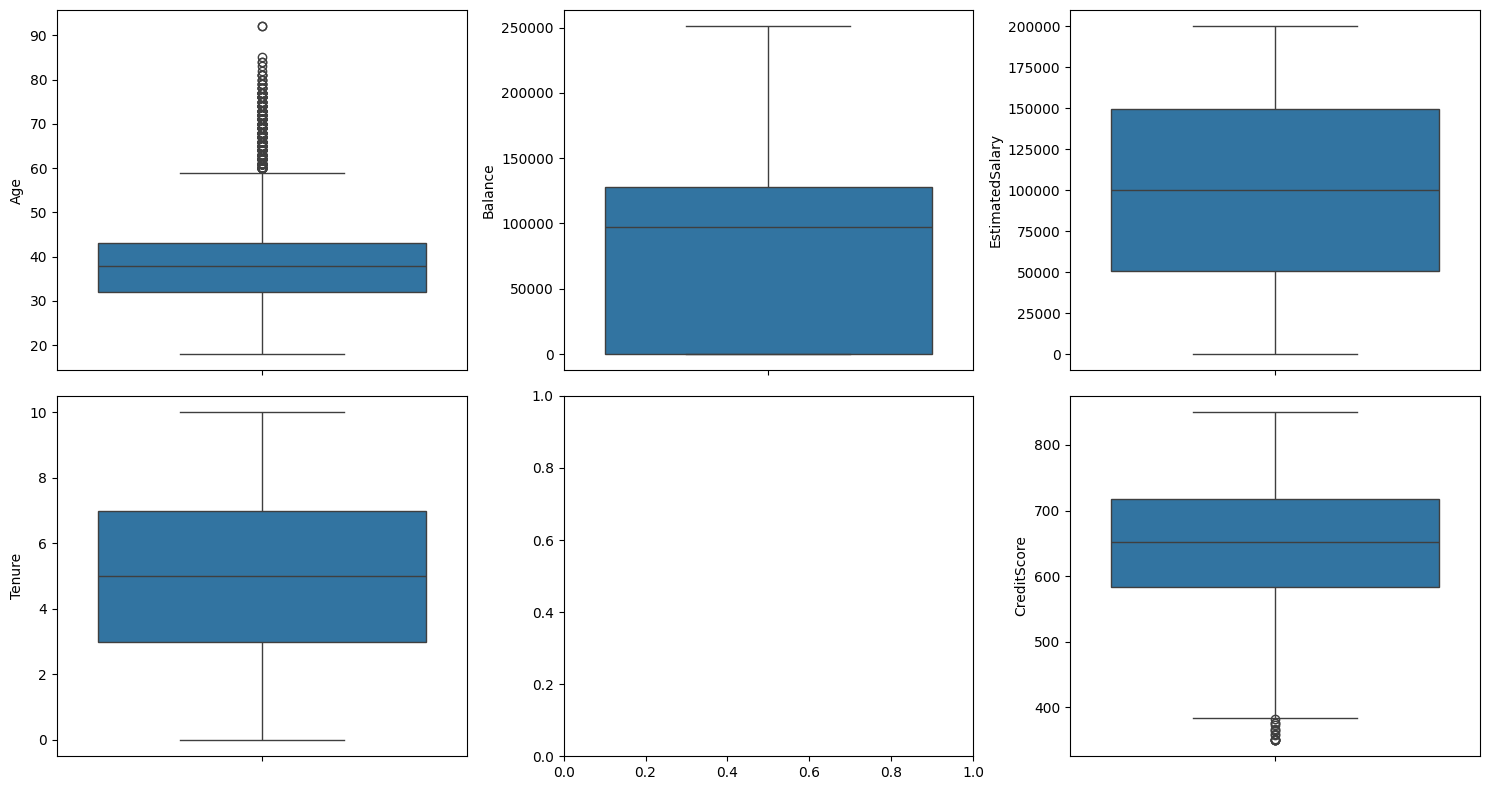

In [55]:
numerical_columns = [
                        'Age', 
                        'Balance',
                        'EstimatedSalary',
                        'Tenure',
                        'CreditScore'
                    ]



fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(data=df['Age'], ax=axes[0,0])
sns.boxplot(data=df['Balance'], ax=axes[0,1])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[0,2])
sns.boxplot(data=df['Tenure'], ax=axes[1,0])
sns.boxplot(data=df['CreditScore'], ax=axes[1,2])

plt.tight_layout()
plt.show()

Since the 'Age' has lots of anomalies, but we cant exactly say they are anomalies. (there might be people who are 99 - 110 years old)